Pipelines that you run on Kubeflow Pipelines can optionally produce output that is rendered in the Kubeflow Pipelines UI. For example, a model training script might export metrics that describe the performance of the model.

This notebook illustrates how to generate the output, as described in the [Visualizing output from your notebooks or Python scripts in the Kubeflow Pipelines UI](https://elyra.readthedocs.io/en/latest/recipes/visualizing-output-in-the-kfp-ui.html) topic in the Elyra documentation.

## Prerequistes

For this notebook to produce the expected results 
- Open it in JupyterLab with the Elyra version 1.5 or later installed
- Run the pipeline on Kubeflow Pipelines 1.0 or later

## Visualize output using the Kubeflow Pipelines output viewer

The Kubeflow Pipelines UI provides support for [several types of visualizations](https://v1-0-branch.kubeflow.org/docs/pipelines/sdk/output-viewer/), such as confusion matrix, markdown, ROC curve, or tables.

To visualize output in the UI, add code to your notebook or Python script that creates a JSON file named `mlpipeline-ui-metadata.json` in the current working directory. The file format is described [here](https://v1-0-branch.kubeflow.org/docs/pipelines/sdk/output-viewer/#available-output-viewers).

The following code snippet produces such a file, which defines a confusion matrix.

In [ ]:
import json
import pandas as pd 

matrix = [
    ['yummy', 'yummy', 10],
    ['yummy', 'not yummy', 2],
    ['not yummy', 'yummy', 6],
    ['not yummy', 'not yummy', 7]
]

df = pd.DataFrame(matrix,columns=['target','predicted','count'])

metadata = {
    "outputs": [
        {
            "type": "confusion_matrix",
            "format": "csv",
            "schema": [
                {
                    "name": "target",
                    "type": "CATEGORY"
                },
                {
                    "name": "predicted",
                    "type": "CATEGORY"
                },
                {
                    "name": "count",
                    "type": "NUMBER"
                }
            ],
            "source": df.to_csv(header=False, index=False),
            "storage": "inline",
            "labels": [
                "yummy",
                "not yummy"
            ]
        }
    ]
}

with open('mlpipeline-ui-metadata.json', 'w') as f:
    json.dump(metadata, f)

After you run this notebook in a pipeline, the visualization should be displayed in the Kubeflow Pipelines UI in the `Artifacts` tab, if you select the notebook's node in the experiment's graph:

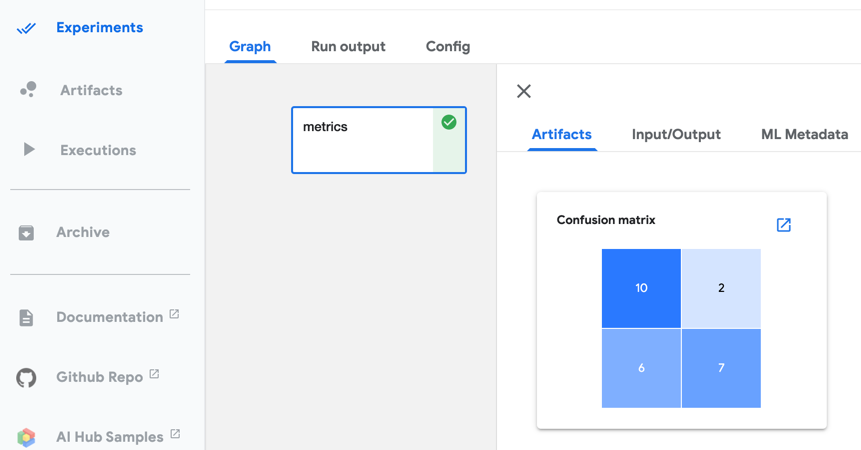

The visualization should also be displayed in the `Run Output` tab: 

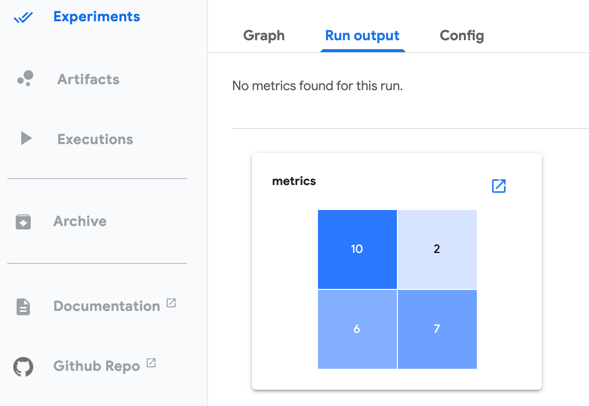


## Visualize scalar performance metrics in the Kubeflow Pipelines UI

To visualize scalar performance metrics the UI, add code to your notebook or Python script that creates a JSON file named `mlpipeline-metrics.json` in the current working directory. The format of this file is described [here](https://v1-0-branch.kubeflow.org/docs/pipelines/sdk/pipelines-metrics/#overview-of-metrics).

The following code snippet produces such a file, which contains a ficticous accuracy classification score and an Area Under the Receiver Operating Characteristic Curve (ROC AUC) score.


In [ ]:
import json
   
# ...
# calculate Accuracy classification score
accuracy_score = 0.6
# calculate Area Under the Receiver Operating Characteristic Curve (ROC AUC)
roc_auc_score = 0.75
 
metrics = {
    'metrics': [
        {
            'name': 'accuracy-score',
            'numberValue':  accuracy_score,
            'format': 'PERCENTAGE'
        },
        {
            'name': 'roc-auc-score',
            'numberValue':  roc_auc_score,
            'format': 'RAW'       
        }
    ]
}

with open('mlpipeline-metrics.json', 'w') as f:
    json.dump(metrics, f)

After you run this notebook in a pipeline, the metrics should be displayed in the experiment's `Run Output` tab 

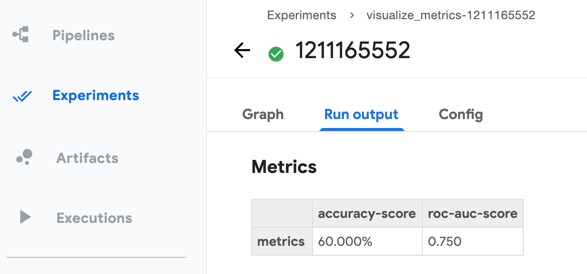


and in the experiment's run page

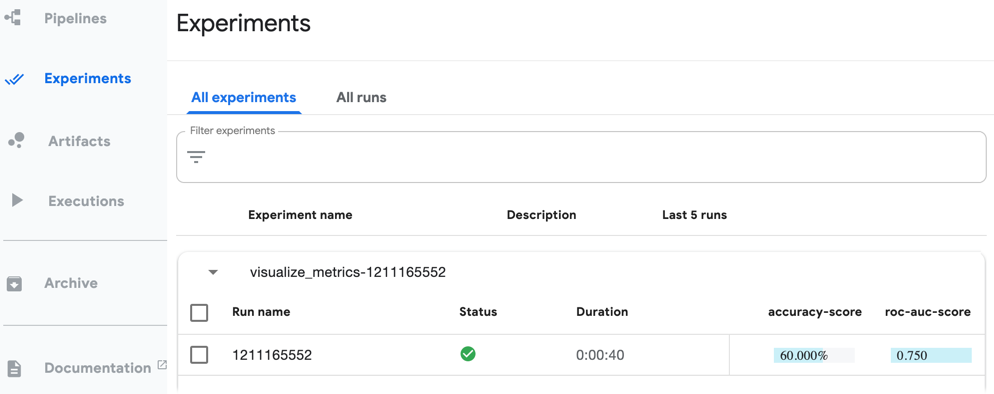


This notebook and its source code are released under the terms of the MIT License.